In [1]:
%matplotlib inline
from __future__ import division
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import pop_prose_splits as pps
import notebook_helpers
import common

# Note: should have run pop_prose_splits.py before running this notebook

FS = (10, 7)

proses = pps.PROSE_SOURCES
n = pps.N_SONGS

In [4]:
pop_ratios = []
keys = pps.get_recent_keys()
for k in keys:
    raw, comp = common.get_sizes(k)
    pop_ratios.append(raw/comp)

prose_ratios = np.zeros( (len(pop_ratios), len(proses)) )
for i, src in enumerate(proses):
    for j in range(len(pop_ratios)):
        path = os.path.join('prose', 'fragments', src, str(j))
        raw = os.path.getsize(path)
        comp = os.path.getsize(path+'.gz')
        prose_ratios[j,i] = raw/comp

ratios = np.concatenate([
    np.asarray(pop_ratios).reshape(-1,1), 
    prose_ratios
], axis=1)
df = pd.DataFrame(ratios, columns=['pop']+proses)
print "Loaded {} recent songs and corresponding samples from prose sources: {}".format(
    len(df), proses
)
df.head(3)

Loaded 100 recent songs and corresponding samples from prose sources: ['poynton', 'comments', 'hansard']


,pop,poynton,comments,hansard
0,3.250000,1.915706,1.804465,2.206151
1,3.142114,1.884073,1.854613,1.913043
2,3.607492,1.907090,1.844725,2.176417


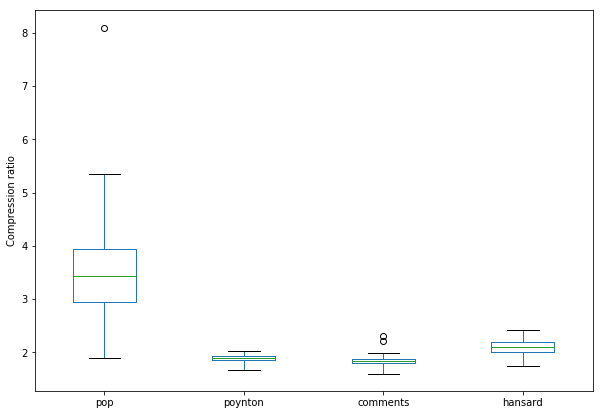

In [5]:
ax = df.plot.box(figsize=FS, whis=3)
ax.set_ylabel('Compression ratio');

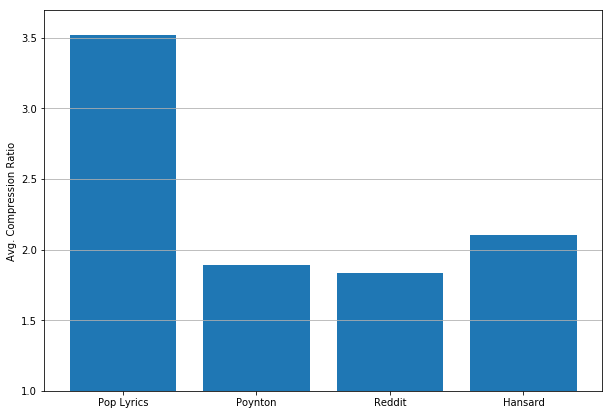

In [23]:
srcs = ['pop'] + proses
ratios = []
ticks = range(len(srcs))
for src in srcs:
    ratios.append(df[src].mean())
fig, ax = plt.subplots(figsize=FS)
ax.bar(range(len(srcs)), ratios, tick_label=['Pop Lyrics', 'Poynton', 'Reddit', 'Hansard']);
ax.set_ylim(bottom=1);
ax.set_ylabel('Avg. Compression Ratio')
ax.grid(axis='y');